<a href="https://colab.research.google.com/github/mariiapopova/netpyne_course_2021/blob/main/Spinal_cord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing software

In [1]:
!pip install neuron
!pip install netpyne

     |████████████████████████████████| 12.6MB 261kB/s 
     |████████████████████████████████| 317kB 3.9MB/s 


Import stuff

In [3]:
from netpyne import specs, sim

In [5]:
netParams = specs.NetParams()
simConfig = specs.SimConfig()

Define cells:

In [6]:
netParams.cellParams['mn'] = {
    "conds": {},
    "secs": {
        "soma": {
            "geom": {
                "diam": 20,
                "L": 20,
                "Ra": 100.0,
                "cm": 1
            },
            "mechs": {
                "hh": {
                    "gnabar": 0.12,
                    "gkbar": 0.036,
                    "gl": 0.0003,
                    "el": -54.3
                }
            }
        }
    }
}

Define pops

In [7]:
netParams.popParams['hip'] = {
    "cellModel": "",
    "cellType": "mn",
    "numCells": 50,
    "xRange": [
        0,
        100
    ],
    "zRange": [
        0,
        100
    ],
    "yRange": [
        0,
        500
    ]
}
netParams.popParams['knee'] = {
    "cellModel": "",
    "cellType": "mn",
    "numCells": 50,
    "yRange": [
        250,
        750
    ],
    "xRange": [
        0,
        100
    ],
    "zRange": [
        0,
        100
    ]
}
netParams.popParams['ankle'] = {
    "cellModel": "",
    "cellType": "mn",
    "numCells": 50,
    "yRange": [
        500,
        1000
    ],
    "xRange": [
        0,
        100
    ],
    "zRange": [
        0,
        100
    ]
}

Specify synapse

In [8]:
netParams.synMechParams['ACh'] = {
    "mod": "Exp2Syn",
    "tau1": 0.1,
    "tau2": 1,
    "e": 0
}

Specify connectivity

In [50]:
netParams.connParams['mn->mn'] = {
    "preConds": {
        "cellType": [
            "mn"
        ]
    },
    "postConds": {
        "cellType": [
            "mn"
        ]
    },
    "synsPerConn": 1,
    "weight": 0.005,
    "probability": 0.1,
    "synMech": "ACh",
    "delay": 'dist_3D/propVelocity'
}

Simulation configuration

In [10]:
simConfig.duration = 1.0

Create and run

In [11]:
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)


Start time:  2021-05-19 20:01:55.511082

Creating network of 3 cell populations on 1 hosts...
  Number of cells on node 0: 150 
  Done; cell creation time = 0.04 s.
Making connections...
  Number of connections on node 0: 2275 
  Done; cell connection time = 0.36 s.
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.

Running simulation for 1.0 ms...
  Done; run time = 0.01 s; real-time ratio: 0.08.

Gathering data...
  Done; gather time = 0.11 s.

Analyzing...
  Cells: 150
  Connections: 2275 (15.17 per cell)
  Spikes: 0 (0.00 Hz)
  Simulated time: 0.0 s; 1 workers
  Run time: 0.01 s
  Done; saving time = 0.05 s.
  Done; plotting time = 0.00 s

Total time = 0.57 s

End time:  2021-05-19 20:01:56.085967


Explore connectivity

Plotting 2D representation of network cell locations and connections...


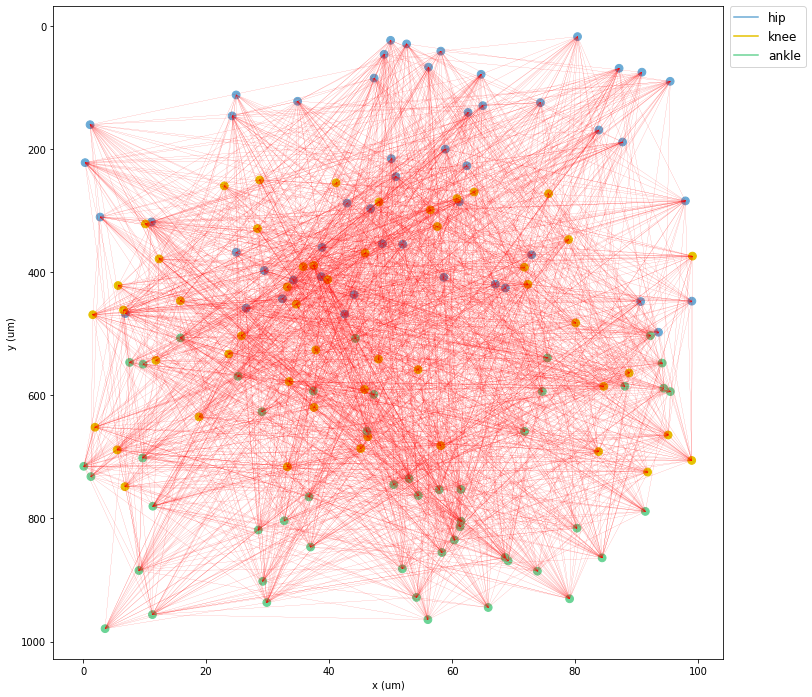

In [17]:
sim.analysis.plot2Dnet(showFig=True);

In [16]:
%matplotlib inline

Plotting connectivity matrix...


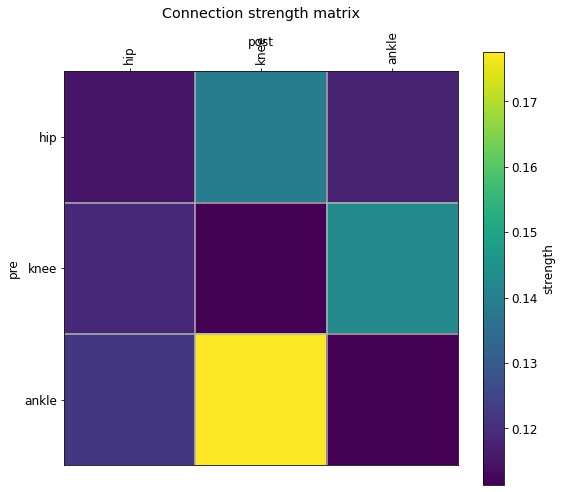

(<Figure size 576x576 with 2 Axes>,
 {'connMatrix': array([[0.1152  , 0.139392, 0.118098],
         [0.119072, 0.111392, 0.142578],
         [0.122018, 0.177608, 0.111392]]),
  'feature': 'strength',
  'groupBy': 'pop',
  'includePost': ['all'],
  'includePre': ['all']})

In [18]:
sim.analysis.plotConn()

Plotting connectivity matrix...


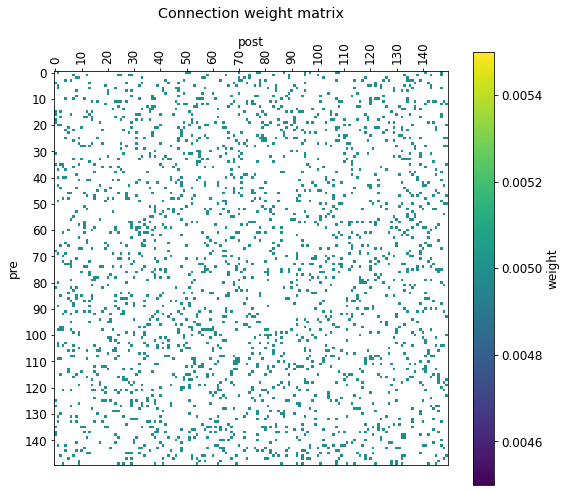

(<Figure size 576x576 with 2 Axes>,
 {'connMatrix': array([[  nan, 0.005,   nan, ..., 0.005,   nan,   nan],
         [  nan,   nan,   nan, ..., 0.005,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         ...,
         [  nan,   nan,   nan, ...,   nan, 0.005,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan]]),
  'feature': 'weight',
  'groupBy': 'cell',
  'includePost': ['all'],
  'includePre': ['all']})

In [20]:
sim.analysis.plotConn(groupBy='cell', feature='weight')

Add stim

In [51]:
netParams.stimSourceParams['bkg']={
    'type': 'NetStim',
    'rate': 10,
    'noise': 0.5
}

In [64]:
netParams.stimTargetParams['bkg->mn'] = {
    'source': 'bkg',
    'conds': {'cellType': 'mn'},
    'weight': 0.001,
    'delay': 5,
    'synMech': 'ACh'
}

Create, simulate, analyze

In [53]:
simConfig.duration = 1000.0

In [54]:
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)


Start time:  2021-05-19 20:32:01.911933

Creating network of 3 cell populations on 1 hosts...
  Number of cells on node 0: 150 
  Done; cell creation time = 0.03 s.
Making connections...
  Number of connections on node 0: 2275 
  Done; cell connection time = 0.41 s.
Adding stims...
  Number of stims on node 0: 150 
  Done; cell stims creation time = 0.03 s.

Running simulation for 1000.0 ms...
  Done; run time = 13.50 s; real-time ratio: 0.07.

Gathering data...
  Done; gather time = 0.12 s.

Analyzing...
  Cells: 150
  Connections: 2425 (16.17 per cell)
  Spikes: 9459 (63.06 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 13.50 s
  Done; saving time = 0.02 s.
  Done; plotting time = 0.00 s

Total time = 14.11 s

End time:  2021-05-19 20:32:16.026536


Explore

In [55]:
sa = sim.analysis

Plotting connectivity matrix...


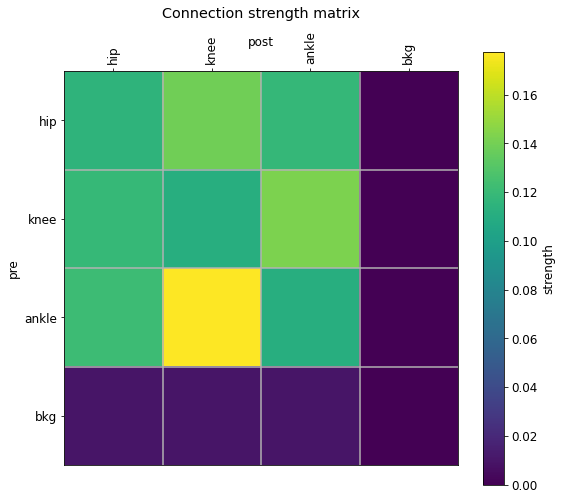

(<Figure size 576x576 with 2 Axes>,
 {'connMatrix': array([[ 0.1152  ,  0.139392,  0.118098, -0.      ],
         [ 0.119072,  0.111392,  0.142578, -0.      ],
         [ 0.122018,  0.177608,  0.111392, -0.      ],
         [ 0.01    ,  0.01    ,  0.01    ,  0.      ]]),
  'feature': 'strength',
  'groupBy': 'pop',
  'includePost': ['all'],
  'includePre': ['all']})

In [56]:
sa.plotConn()

Plotting raster...


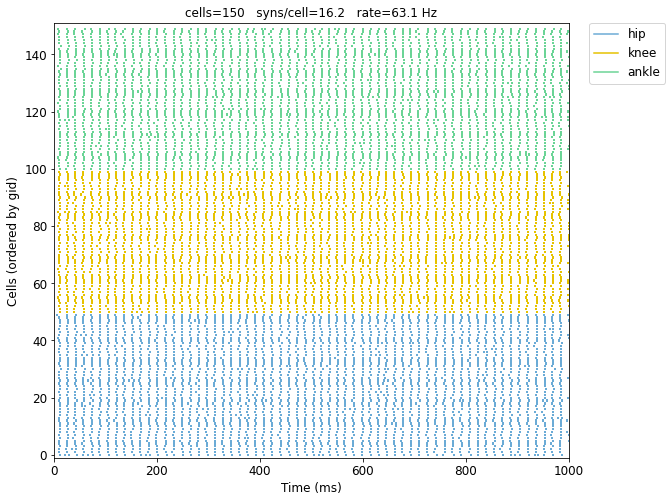

In [57]:
sa.plotRaster();

In [45]:
netParams.propVelocity = 150

In [65]:
netParams.stimSourceParams['IClamp1']={
    'type': 'IClamp',
    'del': 300,
    'dur': 100,
    'amp': 0.5
}

In [66]:
netParams.stimTargetParams['Iclamp1->0'] = {
    'source': 'IClamp1',
    'sec': 'soma',
    'loc': 0.5,
    'conds': {'cellList':[0]}}

In [67]:
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)


Start time:  2021-05-19 20:39:18.910621

Creating network of 3 cell populations on 1 hosts...
  Number of cells on node 0: 150 
  Done; cell creation time = 0.02 s.
Making connections...
  Number of connections on node 0: 2275 
  Done; cell connection time = 0.42 s.
Adding stims...
  Number of stims on node 0: 151 
  Done; cell stims creation time = 0.02 s.

Running simulation for 1000.0 ms...
  Done; run time = 25.69 s; real-time ratio: 0.04.

Gathering data...
  Done; gather time = 0.42 s.

Analyzing...
  Cells: 150
  Connections: 2425 (16.17 per cell)
  Spikes: 604 (4.03 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 25.69 s
  Done; saving time = 0.02 s.
  Done; plotting time = 0.00 s

Total time = 26.62 s

End time:  2021-05-19 20:39:45.530742


Plotting raster...


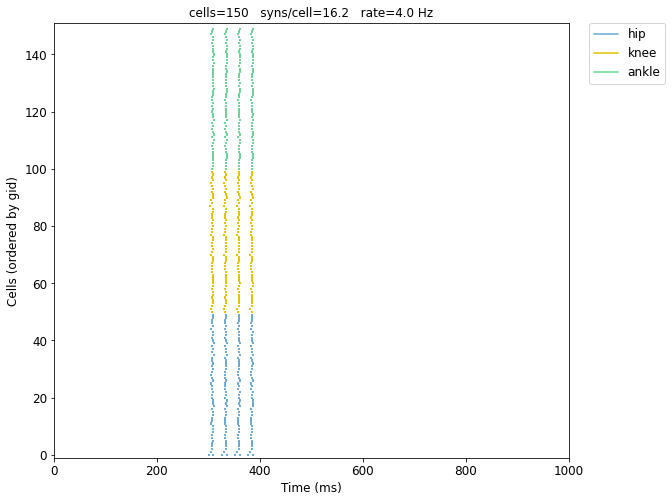

In [68]:
sa.plotRaster();